In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [2]:
new_df = pd.read_csv('data_preprocessed.csv')

In [3]:
new_df = new_df.drop(new_df[new_df["meas_depth"]==0].index)
new_df = new_df.drop(new_df[new_df["meas_width"]==0].index)
new_df = new_df.drop(new_df[new_df["meas_length"]==0].index)
new_df.shape

(217910, 27)

In [4]:
new_df.drop("Unnamed: 0", axis = 1, inplace=True)

In [5]:
data_df = new_df.drop("total_sales_price", axis='columns')

In [6]:
cols = list(data_df.columns)

In [7]:
df = new_df.copy()

In [8]:
diamonds_train , diamonds_test_unscaled, price, price_test = train_test_split(data_df, df['total_sales_price'], random_state=42, test_size=0.2)

In [9]:
diamonds_train

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,fancy_color_intensity_pre,fancy_color_overtone_pre,fancy_color_secondary_color_pre,fancy_color_dominant_color_pre,...,cut_pre,color_pre,clarity_pre,cut_quality_pre,lab_pre,symmetry_pre,polish_pre,eye_clean_pre,culet_size_pre,volume
189535,1.50,62.8,58.0,7.23,7.29,4.56,9,8,10,12,...,10,7,7,0,0,0,0,4,3,240.342552
195666,1.17,59.3,59.0,6.89,6.91,4.09,9,8,10,12,...,10,3,9,0,0,0,0,4,3,194.724491
117651,0.54,63.0,57.0,5.16,5.20,3.27,9,8,10,12,...,10,6,7,0,0,0,0,3,3,87.740640
153708,0.70,68.6,69.0,5.59,4.46,3.06,9,8,10,12,...,3,0,10,5,0,4,4,4,3,76.290084
22528,0.33,61.1,58.0,4.44,4.47,2.72,9,8,10,12,...,10,7,7,0,0,0,0,3,8,53.983296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121092,0.50,64.1,57.0,5.95,4.57,2.93,9,8,10,12,...,6,1,10,5,0,4,0,4,8,79.671095
104745,0.42,61.7,59.0,4.81,4.82,2.97,9,8,10,12,...,10,2,7,0,0,0,0,4,8,68.857074
133241,0.50,62.7,58.0,5.03,5.09,3.17,9,8,10,12,...,10,0,8,0,0,4,0,4,3,81.160559
148281,0.60,63.5,56.0,5.32,5.35,3.39,9,8,10,12,...,10,4,7,0,0,0,0,4,8,96.486180


In [10]:
scaler = StandardScaler()
scaler.fit(diamonds_train)
diamonds = scaler.transform(diamonds_train)

scaler.fit(diamonds_test_unscaled)
diamonds_test = scaler.transform(diamonds_test_unscaled)

In [11]:
pd.DataFrame(diamonds, columns=cols)

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,fancy_color_intensity_pre,fancy_color_overtone_pre,fancy_color_secondary_color_pre,fancy_color_dominant_color_pre,...,cut_pre,color_pre,clarity_pre,cut_quality_pre,lab_pre,symmetry_pre,polish_pre,eye_clean_pre,culet_size_pre,volume
0,0.875105,0.084841,-0.010443,0.965386,1.636686,0.616974,0.196034,0.094826,0.061302,0.140202,...,0.533476,1.350421,0.164512,-0.860979,-0.296257,-0.804006,-0.495112,0.601905,-0.801748,0.869783
1,0.486864,-0.318682,0.101473,0.765248,1.342770,0.384904,0.196034,0.094826,0.061302,0.140202,...,0.533476,-0.150711,0.962924,-0.860979,-0.296257,-0.804006,-0.495112,0.601905,-0.801748,0.552627
2,-0.254324,0.107899,-0.122358,-0.253103,0.020148,-0.019985,0.196034,0.094826,0.061302,0.140202,...,0.533476,0.975138,0.164512,-0.860979,-0.296257,-0.804006,-0.495112,-1.418172,-0.801748,-0.191169
3,-0.066086,0.753536,1.220625,0.000013,-0.552215,-0.123676,0.196034,0.094826,0.061302,0.140202,...,-2.406354,-1.276561,1.362130,1.295229,-0.296257,1.273335,2.042652,0.601905,-0.801748,-0.270778
4,-0.501386,-0.111156,-0.010443,-0.676925,-0.544481,-0.291556,0.196034,0.094826,0.061302,0.140202,...,0.533476,1.350421,0.164512,-0.860979,-0.296257,-0.804006,-0.495112,-1.418172,1.252811,-0.425864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174323,-0.301383,0.234721,-0.122358,0.211925,-0.467134,-0.187865,0.196034,0.094826,0.061302,0.140202,...,-1.146427,-0.901278,1.362130,1.295229,-0.296257,1.273335,-0.495112,0.601905,1.252811,-0.247272
174324,-0.395502,-0.041981,0.101473,-0.459127,-0.273769,-0.168115,0.196034,0.094826,0.061302,0.140202,...,0.533476,-0.525994,0.164512,-0.860979,-0.296257,-0.804006,-0.495112,0.601905,1.252811,-0.322456
174325,-0.301383,0.073311,-0.010443,-0.329626,-0.064933,-0.069361,0.196034,0.094826,0.061302,0.140202,...,0.533476,-1.276561,0.563718,-0.860979,-0.296257,1.273335,-0.495112,0.601905,-0.801748,-0.236917
174326,-0.183734,0.165545,-0.234273,-0.158920,0.136167,0.039267,0.196034,0.094826,0.061302,0.140202,...,0.533476,0.224572,0.164512,-0.860979,-0.296257,-0.804006,-0.495112,0.601905,1.252811,-0.130367


In [12]:
pd.DataFrame(diamonds_test, columns=cols)

,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,fancy_color_intensity_pre,fancy_color_overtone_pre,fancy_color_secondary_color_pre,fancy_color_dominant_color_pre,...,cut_pre,color_pre,clarity_pre,cut_quality_pre,lab_pre,symmetry_pre,polish_pre,eye_clean_pre,culet_size_pre,volume
0,-0.631716,-0.233820,0.104528,-0.941687,-0.874283,-0.437822,0.19875,0.092109,0.063836,0.144021,...,0.538084,0.966444,-1.431903,-0.867998,-0.301652,-0.812331,-0.495222,0.593886,-0.807715,-0.496019
1,-0.619759,0.011321,-0.115866,-0.965171,-0.904300,-0.404569,0.19875,0.092109,0.063836,0.144021,...,0.538084,-0.157014,0.166386,-0.867998,3.517257,-0.812331,-0.495222,-1.404782,1.242790,-0.493863
2,-0.069729,0.089321,-0.115866,0.021165,0.378898,0.113241,0.19875,0.092109,0.063836,0.144021,...,0.538084,-0.905986,0.565958,-0.867998,-0.301652,-0.812331,-0.495222,0.593886,1.242790,-0.012318
3,-0.548016,0.089321,-0.336260,-0.783169,-0.664169,-0.300057,0.19875,0.092109,0.063836,0.144021,...,0.538084,-0.531500,-1.032331,0.854089,-0.301652,-0.812331,2.044151,-1.404782,-0.807715,-0.426974
4,-0.189301,0.055892,-0.115866,-0.137354,0.168784,0.022981,0.19875,0.092109,0.063836,0.144021,...,0.538084,1.340931,0.965531,-0.867998,-0.301652,-0.812331,-0.495222,0.593886,-0.807715,-0.116801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43577,-0.428444,-0.022107,0.214725,-0.542456,-0.356502,-0.200295,0.19875,0.092109,0.063836,0.144021,...,0.538084,-0.905986,0.166386,-0.867998,-0.301652,1.261173,2.044151,0.593886,1.242790,-0.334056
43578,-0.548016,0.278748,-0.115866,-0.830137,-0.701689,-0.281054,0.19875,0.092109,0.063836,0.144021,...,0.538084,-0.905986,-0.632758,0.854089,3.517257,1.261173,2.044151,0.593886,1.242790,-0.431939
43579,-0.548016,-0.166963,0.104528,-0.771427,-0.656665,-0.342811,0.19875,0.092109,0.063836,0.144021,...,0.538084,-0.157014,0.565958,0.854089,-0.301652,-0.812331,-0.495222,0.593886,1.242790,-0.435396
43580,1.125987,0.122749,0.324922,2.698363,1.076777,0.407775,0.19875,0.092109,0.063836,0.144021,...,-0.719038,-0.157014,1.365103,1.284611,-0.301652,-0.812331,-0.495222,-1.404782,-0.807715,1.061831


In [13]:
score_type = ["neg_mean_absolute_error", "neg_mean_squared_error"]
degrees = [1,2]

# Regression Model building

In [14]:
lin_reg = LinearRegression()

In [15]:
model_results = pd.DataFrame()
model_results['Train_MAE'] = None
model_results['Train_RMSE'] = None
model_results['Validation_MAE'] = None
model_results['Validation_RMSE'] = None

In [16]:
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    diamonds_poly = poly_features.fit_transform(diamonds)
    
    score = cross_validate(lin_reg, diamonds_poly, price, scoring=score_type, cv=5, return_train_score=True, verbose=1)
    
    train_rmse = np.sqrt(-score['train_neg_mean_squared_error']).mean()
    train_mae = (-score['train_neg_mean_absolute_error']).mean()
    validation_rmse = np.sqrt(-score['test_neg_mean_squared_error']).mean()
    validation_mae = (-score['test_neg_mean_absolute_error']).mean()

    model_results.loc["Polynomial_Regression " + str(degree) , ['Train_RMSE', 'Train_MAE', 'Validation_RMSE', 'Validation_MAE', "best_params"]] = [train_rmse, train_mae, validation_rmse, validation_mae, degree]
    

<ul style="font-size: 18px">
    <li>Here we can see the result of the Linear Regression and Polynomial Regression of degree 2 using cross validation method.</li>
</ul>

In [17]:
model_results

,Train_MAE,Train_RMSE,Validation_MAE,Validation_RMSE,best_params
Polynomial_Regression 1,3936.702076,15969.789345,3941.167788,15991.113191,1.0
Polynomial_Regression 2,2417.015481,11673.287285,2481.228431,12669.507894,2.0


<ul style="font-size: 18px">
    <li>Now, let's evaluate different models like, Decision Tree, Random Forest and XGB using their predefined parameters.</li>
</ul>

In [18]:
models = {
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "RandomForestRegressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor()
}

In [19]:
for model_name, model in models.items():
    model_score = cross_validate(model, diamonds, price, scoring=score_type, cv=5, return_train_score=True, verbose=1)
    train_rmse = np.sqrt(-model_score['train_neg_mean_squared_error']).mean()
    train_mae = (-model_score['train_neg_mean_absolute_error']).mean()
    validation_rmse = np.sqrt(-model_score['test_neg_mean_squared_error']).mean()
    validation_mae = (-model_score['test_neg_mean_absolute_error']).mean()

    model_results.loc[model_name , ['Train_RMSE', 'Train_MAE', 'Validation_RMSE', 'Validation_MAE']] = [train_rmse, train_mae, validation_rmse, validation_mae]

<ul style="font-size: 18px">
    <li>Here we can see the result of all of the models we've used so far.</li>
</ul>

In [20]:
model_results

,Train_MAE,Train_RMSE,Validation_MAE,Validation_RMSE,best_params
Polynomial_Regression 1,3936.702076,15969.789345,3941.167788,15991.113191,1.0
Polynomial_Regression 2,2417.015481,11673.287285,2481.228431,12669.507894,2.0
DecisionTreeRegressor,0.304939,29.488826,1286.470249,13683.045822,NaN
RandomForestRegressor,374.04915,3808.901294,1017.19481,10673.824888,NaN
XGBRegressor,573.607392,1709.968829,1005.072271,9135.049009,NaN


<ul style="font-size: 18px">
    <li>As we can see above, Random Forest and XGB models have less RMSE values than all of the other models.</li>
    <li>We can also see that, Train RMSE is much lower than Validation_RMSE in DecisionTreeRegressor, RandomForestRegressor and XGBRegressor. This represents the overfitting in the model.</li>
    <li>So, now let's fine tune these two models to get the better parameters for these models.</li>
    <li>We've used different paramaters for both of these models to get the best score out of it!</li>
</ul>

# Hyperparameter Tuning

In [21]:
model_dict = {
    "RandomForestRegressor": {'model': RandomForestRegressor(random_state=42),
                             'params': {'n_estimators': list(range(5,50, 5)), 'max_depth': list(range(1, 10, 2)),
                                         'min_samples_split': [2, 5, 10]}},
    'XGBRegressor': {"model": XGBRegressor(), "params": {'max_depth': [6, 7, 9], 
                                                         'n_estimators': list(range(100, 800, 100)), 
                                                         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                                                        'subsample': [0.2, 0.3, 0.4],
                                                        'gamma': [0, 0.5, 0.6, 0.7],
                                                        'reg_lambda': [0, 1, 5, 10]}}
}

In [24]:
def hyperparameter_tuning():
    
    best_model = None
    best_score = -math.inf
    
    for model_name, reg_model in model_dict.items():
        
        hyper_tuning_model = RandomizedSearchCV(reg_model['model'], reg_model['params'], n_iter=10, n_jobs=-1, cv=5, return_train_score=True, verbose=2, scoring=score_type, refit="neg_mean_squared_error")
        hyper_tuning_model.fit(diamonds, price)
        
        model_res = hyper_tuning_model.best_estimator_
        best_model_score = hyper_tuning_model.best_score_
        
        res = hyper_tuning_model.cv_results_
        
        print(model_name, " :: ", best_model_score, hyper_tuning_model.best_params_)
        
        if best_model_score > best_score:
            best_score = best_model_score
            best_model = model_res

    print("Best Model :: ", best_model)
    
    return best_model

<ul style="font-size: 18px">
    <li>The function mentioned above is used for hyperparameter tuning for given model.</li>
    <li>There are two methods in the sklearn library, to find the best parameters of any given model. GridSearchCV and RandomisedSearchCV</li>
    <li>Due to the large size of the datasize, we've used RandomisedSearchCV with 10 parameters sampled for each model.</li>
    <li>We've determined the best model using the one with the highest score in RandomisedSearchCV.</li>
</ul>

In [25]:
best_model = hyperparameter_tuning()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
RandomForestRegressor  ::  -134002027.78386426 {'n_estimators': 25, 'min_samples_split': 10, 'max_depth': 7}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
XGBRegressor  ::  -77196889.70919968 {'subsample': 0.4, 'reg_lambda': 5, 'n_estimators': 700, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0}
Best Model ::  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=Non

<ul style="font-size: 18px">
    <li>As shown above, the score for XGBRegressor is higher than the RandomForestRegressor.</li>
    <li>So, from the RandomisedSearchCV, we got the best parameters as shown above for each of the model.</li>
    <li>We've also returned the best model from the function which we can use to find the model's perforamnce on our test dataset.</li>
</ul>

# Evaluation

In [26]:
price_predict = best_model.predict(diamonds_test)

In [27]:
price_mse = mean_squared_error(price_test, price_predict)
price_rmse = np.sqrt(price_mse)

In [28]:
price_rmse

8147.250629439233

In [29]:
price_r2 = r2_score(price_test, price_predict)
price_r2

0.8943280110517966

<ul style="font-size: 18px">
    <li>We can see the RMSE value of our model in test dataset as shown above.</li>
    <li>The R2 score for our model on test dataset is also shown, which lies from 0 to 1.</li>
</ul>

In [30]:
from scipy import stats
from statistics import stdev

In [31]:
confidence = 0.95
squared_errors = (price_predict - price_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([ 4888.23604618, 10433.62516073])

<ul style="font-size: 18px">
    <li>Here we can see the 95% value of the errors in the dataset.</li>
    <li>It shows that the 95% of the error lies between these two values!</li>
</ul>

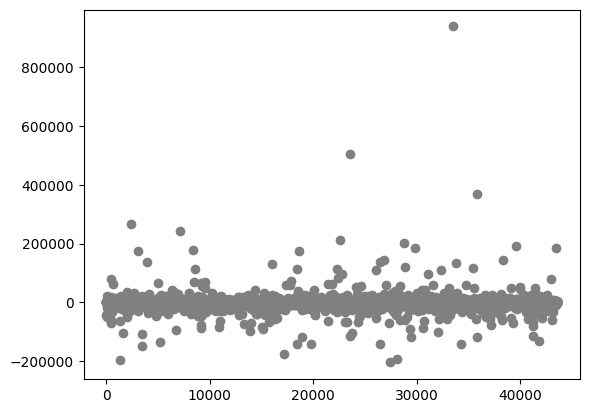

In [32]:
plt.plot(list(price_test)-price_predict, marker='o', linestyle='', color='gray')

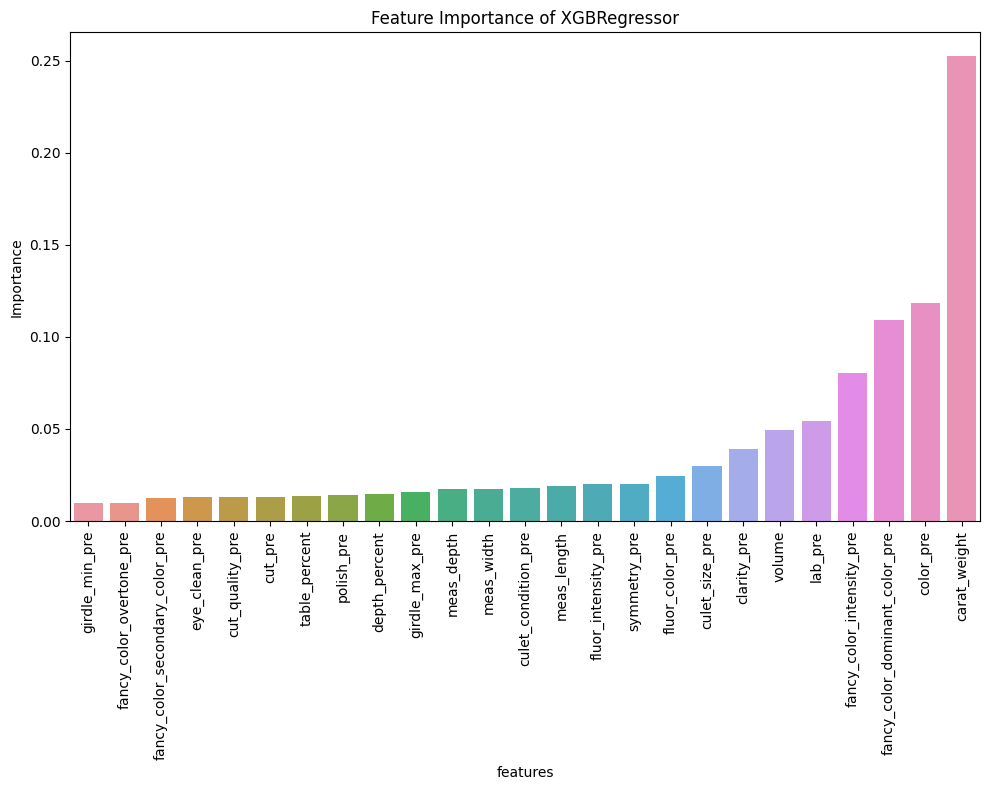

In [33]:
feature_importance = pd.DataFrame()
feature_importance['Importance'] = best_model.feature_importances_
feature_importance['features'] = np.array(cols)

feature_importance = feature_importance.sort_values('Importance', ascending=True).reset_index()

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=feature_importance, x='features', y='Importance', ax=ax, order=feature_importance['features'])
ax.set_title("Feature Importance of XGBRegressor")
plt.xticks(rotation = 90)
fig.tight_layout()

<ul style="font-size: 18px">
    <li>Here we can see the importance of features for our dataset.</li>
    <li>As shown above, carat weight has the highest importance of all to determine the price of the diamond!</li>
</ul>